In [107]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Import data

In [108]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [109]:
df = pd.read_csv('shampoo.csv',date_parser=parser)

In [110]:
df['Month'] = df['Month'].apply(parser) 

In [111]:
df.head()

,Month,Sales
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3
4,1901-05-01,180.3


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   36 non-null     datetime64[ns]
 1   Sales   36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


In [113]:
df1 = df.set_index('Month')
df1.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


# 1. Identifikasi Model

## 1.1 Plot Time Series

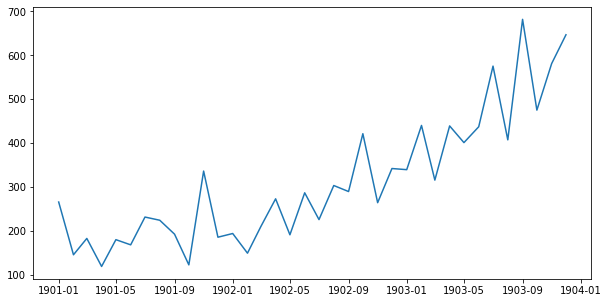

In [114]:
"""
Plot time series menunjukkan bahwa terdapat pola trend sehingga dapat dipastikan bahwa data tidak stasioner
terhadap rata-rata.
"""
plt.figure(figsize=(10,5))
plt.plot(df1)

## 1.2 Plot ACF dan PACF

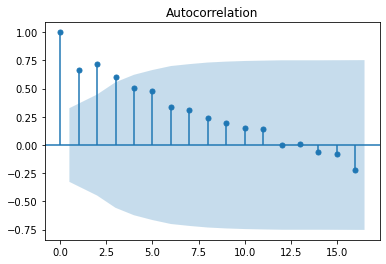

In [115]:
"""
Plot Autokorelasi menunjukkan bahwa data tidak stasioner terhadap rata-rata karena
plot acf menurun exponensial dan terdapat 3 lag yang korelasinya tinggi.
"""
plot_acf(df1.values.squeeze())
plt.show()

## 1.3 Lag Difference

In [116]:
# Diff 1
df_dif1 = df1.diff(1)

In [117]:
# Remove nan values
df_dif1.dropna(axis=0,inplace=True)

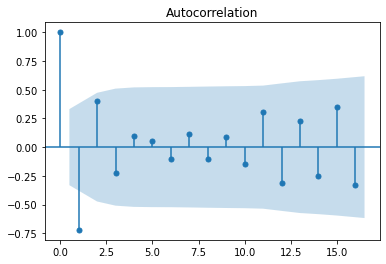

In [118]:
# Plot ACF
plot_acf(df_dif1.values.squeeze())
plt.show()

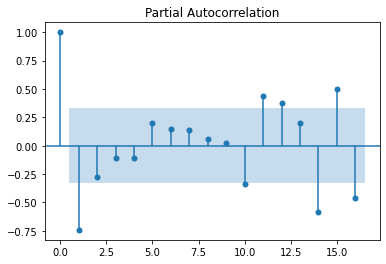

In [119]:
# Plot PACF
plot_pacf(df_dif1.values.squeeze())
plt.show()

## Kesimpulan
Berdasarkan plot ACF dan PACF orde yang didapatkan adalah p = 1, d = 1, dan q = 0 sehingga model tentative yang bisa dipakai adalah ARIMA(1,1,0).


# 2. Fitting Model

In [120]:
df1.index = df1.index.to_period('M')

In [121]:
model = ARIMA(df1, order=(1,1,0))
model_fit = model.fit()

In [124]:
"""
Dapat dilihat bahwa koefisien signifikan
"""
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -201.287
Date:                Sun, 21 Mar 2021   AIC                            406.575
Time:                        14:07:10   BIC                            409.686
Sample:                    01-31-1901   HQIC                           407.649
                         - 12-31-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7142      0.136     -5.259      0.000      -0.980      -0.448
sigma2      5683.4515   1448.557      3.924      0.000    2844.331    8522.572
Ljung-Box (L1) (Q):                   1.89   Jarque-

# 3. Diagnostic Model

In [86]:
residuals = pd.DataFrame(model_fit.resid)
residuals.columns = ['residual']

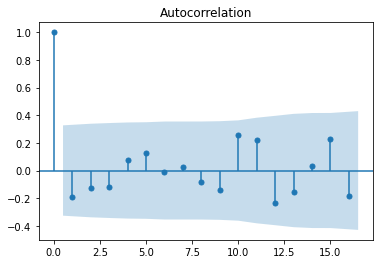

In [87]:
"""
Asumsi yang harus dipenuhi di ARIMA adalah white noise yang bisa dilihat dari ACF Sisaan.
Jika ACF Sisaan tidak ada lag yang signifikan, maka dapat dikatakan bahwa residual bersifat white noise.
"""
plot_acf(residuals.values.squeeze())
plt.show()

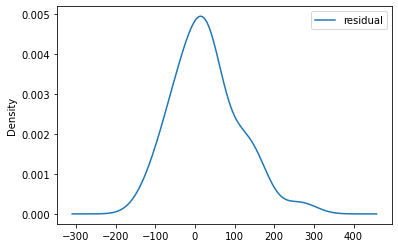

In [88]:
"""
Residual juga berdistribusi normal.
"""
residuals.plot(kind='kde')
pyplot.show()

# Refference

1. https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
2. https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html